# Quiz 3

In [1]:
import numpy as np 
import scipy.stats as sts
import seaborn as sns
from statsmodels.stats.proportion import proportion_confint
from statsmodels.stats.proportion import samplesize_confint_proportion
from scipy.stats import norm

import matplotlib.pyplot as plt
%matplotlib inline

## Question 1

Давайте уточним правило трёх сигм. Утверждение: 99.7% вероятностной массы случайной величины X∼N(μ,σ2) лежит в интервале μ±c⋅σ. Чему равно точное значение константы c? Округлите ответ до четырёх знаков после десятичной точки.

In [2]:
from scipy import stats

print('Answer: %.4f' % stats.norm.ppf(1-0.003/2))

Answer: 2.9677


In [3]:
x = np.linspace(stats.norm.ppf(0.001), stats.norm.ppf(0.999), 100)

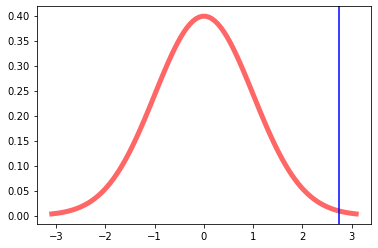

In [4]:
fig, ax = plt.subplots(1, 1)
ax.plot(x, norm.pdf(x), 'r-', lw=5, alpha=0.6, label='norm pdf')
ax.axvline(x = stats.norm.ppf(0.997), color = 'b', label = 'axvline - full height')

## Question 5

В пятилетнем рандомизированном исследовании Гарвардской медицинской школы 11037 испытуемых через день принимали аспирин, а ещё 11034 — плацебо. Исследование было слепым, то есть, испытуемые не знали, что именно они принимают.

За 5 лет инфаркт случился у 104 испытуемых, принимавших аспирин, и у 189 принимавших плацебо. 

Оцените, насколько вероятность инфаркта снижается при приёме аспирина. Округлите ответ до четырёх знаков после десятичной точки.

In [5]:
n_asp, n_pl = 11037, 11034 #people in group
ha_asp, ha_pl = 104,  189  # heart attack

In [7]:
data_asp = np.concatenate((np.ones((ha_asp)), np.zeros((n_asp - ha_asp))), axis=None)
data_pl = np.concatenate((np.ones((ha_pl)), np.zeros((n_pl - ha_pl))), axis=None)

In [33]:
prop_asp = data_asp.sum() / data_asp.shape[0]
prop_pl = data_pl.sum() / data_pl.shape[0]
prop_decrease = (prop_pl-prop_asp)
print("probability of heart attack lowers with aspirin by %.4f presents" % (prop_decrease ))

probability of heart attack lowers with aspirin by 0.0077 presents


## Question 6

Постройте теперь 95% доверительный интервал для снижения вероятности инфаркта при приёме аспирина. Чему равна его верхняя граница? Округлите ответ до четырёх знаков после десятичной точки

Доверительный интервал для доли 
$$\hat{p}\pm z_{1-\frac{\alpha}{2}} \sqrt{\frac{\hat{p}\left(1-\hat{p}\right)}{n}}$$

Доверительный интервал для двух долей: $p_1 - p_2$
$$ \hat{p}_1 - \hat{p}_2 \pm z_{1-\frac{\alpha}{2}}\sqrt{\frac{\hat{p}_1(1 - \hat{p}_1)}{n_1} + \frac{\hat{p}_2(1 - \hat{p}_2)}{n_2}}$$

In [11]:
def proportions_confint_diff_ind(sample1, sample2, alpha = 0.05):    
    z = stats.norm.ppf(1 - alpha / 2.)   
    p1 = float(sum(sample1)) / len(sample1)
    p2 = float(sum(sample2)) / len(sample2)
    
    left_boundary = (p1 - p2) - z * np.sqrt(p1 * (1 - p1)/ len(sample1) + p2 * (1 - p2)/ len(sample2))
    right_boundary = (p1 - p2) + z * np.sqrt(p1 * (1 - p1)/ len(sample1) + p2 * (1 - p2)/ len(sample2))
    
    return (left_boundary, right_boundary)

In [12]:
#print "confidence interval: [%f, %f]" % proportions_confint_diff_ind(data.banner_a, data.banner_b)

In [13]:
proportions_confint_diff_ind(data_pl, data_asp, alpha = 0.05)

(0.004687750675049439, 0.010724297276960124)

In [14]:
stats.norm.ppf(0.95)

1.6448536269514722

## Question 7
Продолжим анализировать данные эксперимента Гарвардской медицинской школы.

Для бернуллиевских случайных величин X∼Ber(p) часто вычисляют величину p1−p, которая называется шансами (odds). Чтобы оценить шансы по выборке, вместо p нужно подставить p^. Например, шансы инфаркта в контрольной группе, принимавшей плацебо, можно оценить как

Оцените, во сколько раз понижаются шансы инфаркта при регулярном приёме аспирина. Округлите ответ до четырёх знаков после десятичной точки. 

In [23]:
def odds(data):
    prop = data.sum()/data.shape[0]
    return prop/(1-prop)

In [16]:
odds_asp = odds(data_asp)
odds_pl = odds(data_pl)
print("%.4f" % (odds_pl/odds_asp))

1.8321


In [17]:
#odds = odds_pl/odds_asp
#odds

##  Question 8

Величина, которую вы оценили в предыдущем вопросе, называется отношением шансов. Постройте для отношения шансов 95% доверительный интервал с помощью бутстрепа. Чему равна его нижняя граница? Округлите ответ до 4 знаков после десятичной точки.

Чтобы получить в точности такой же доверительный интервал, как у нас:

составьте векторы исходов в контрольной и тестовой выборках так, чтобы в начале шли все единицы, а потом все нули;

установите random seed=0;

сделайте по 1000 псевдовыборок из каждой группы пациентов с помощью функции get_bootstrap_samples.

In [18]:
def get_bootstrap_samples(data, n_samples):
    indices = np.random.randint(0, len(data), (n_samples, len(data)))
    samples = data[indices]
    return samples

In [19]:
def stat_intervals(stat, alpha):
    boundaries = np.percentile(stat, [100 * alpha / 2., 100 * (1 - alpha / 2.)])
    return boundaries

In [68]:
np.random.seed(0)
odds_aspirin_data = np.fromiter(map(odds, get_bootstrap_samples(data_asp, 1000)),dtype=np.float)
odds_placebo_data = np.fromiter(map(odds, get_bootstrap_samples(data_pl, 1000)),dtype=np.float)

odds_ratio = np.divide(np.array(odds_placebo_data), np.array(odds_aspirin_data))
print('95%% confidence interval for times decrease of infarction: %s' %
      str(stat_intervals(odds_ratio, 0.05)))

95% confidence interval for times decrease of infarction: [1.44419465 2.34321168]


А еще можно так (неэффективно?)

In [70]:
np.random.seed(0)
bs_asp = get_bootstrap_samples(data_asp, 1000)
odds_asp = np.array([odds(sample) for sample in bs])

bs_pl = get_bootstrap_samples(data_pl, 1000)
odds_pl = np.array([odds(sample) for sample in bs_pl])

In [71]:
print('95% confidence interval for times decrease of infarction:',
      (np.around(stat_intervals(odds_pl / odds_asp, 0.05),decimals=4)))

95% confidence interval for times decrease of infarction: [1.4442 2.3432]
